In [1]:
'''
Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: indicates the function which scores likelihood of diabetes based on family history: it provides a synthesis of the diabetes mellitus history in relatives and the genetic relationship of those relatives to the subject
Age: Age (years)
Outcome: Class variable (0 or 1)
'''

'\nPregnancies: Number of times pregnant\nGlucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test\nBloodPressure: Diastolic blood pressure (mm Hg)\nSkinThickness: Triceps skin fold thickness (mm)\nInsulin: 2-Hour serum insulin (mu U/ml)\nBMI: Body mass index (weight in kg/(height in m)^2)\nDiabetesPedigreeFunction: indicates the function which scores likelihood of diabetes based on family history: it provides a synthesis of the diabetes mellitus history in relatives and the genetic relationship of those relatives to the subject\nAge: Age (years)\nOutcome: Class variable (0 or 1)\n'

In [2]:
#https://www.kaggle.com/code/adamhertelendi/diabetes-ds-data-analysis
#https://www.kaggle.com/code/shiviyadav/a-neural-network-based-diabetes-prediction/notebook

In [3]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
#Displaying top 5 columns
df = pd.read_csv(r"C:\Users\Tejas Ligade\Downloads\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Checking the datatype of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#All the variables in the data are numerical variables
#Outcome is the target variable

In [8]:
#Checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#Checking for duplicate values in the data
df.duplicated().sum()

0

In [10]:
#Outcome is the target variable
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
#This is a classification problem with output variable having two classes
# 0 - Non Diabetic
# 1 - Diabetic
#As we can see the data imbalanced. It is tilted toward not having the diabetes by almost twicebthan having diabetes

In [12]:
#Mean value for all input variables wrt output variable
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [13]:
#Checking Outliers in the data using boxplot and histogram visulization

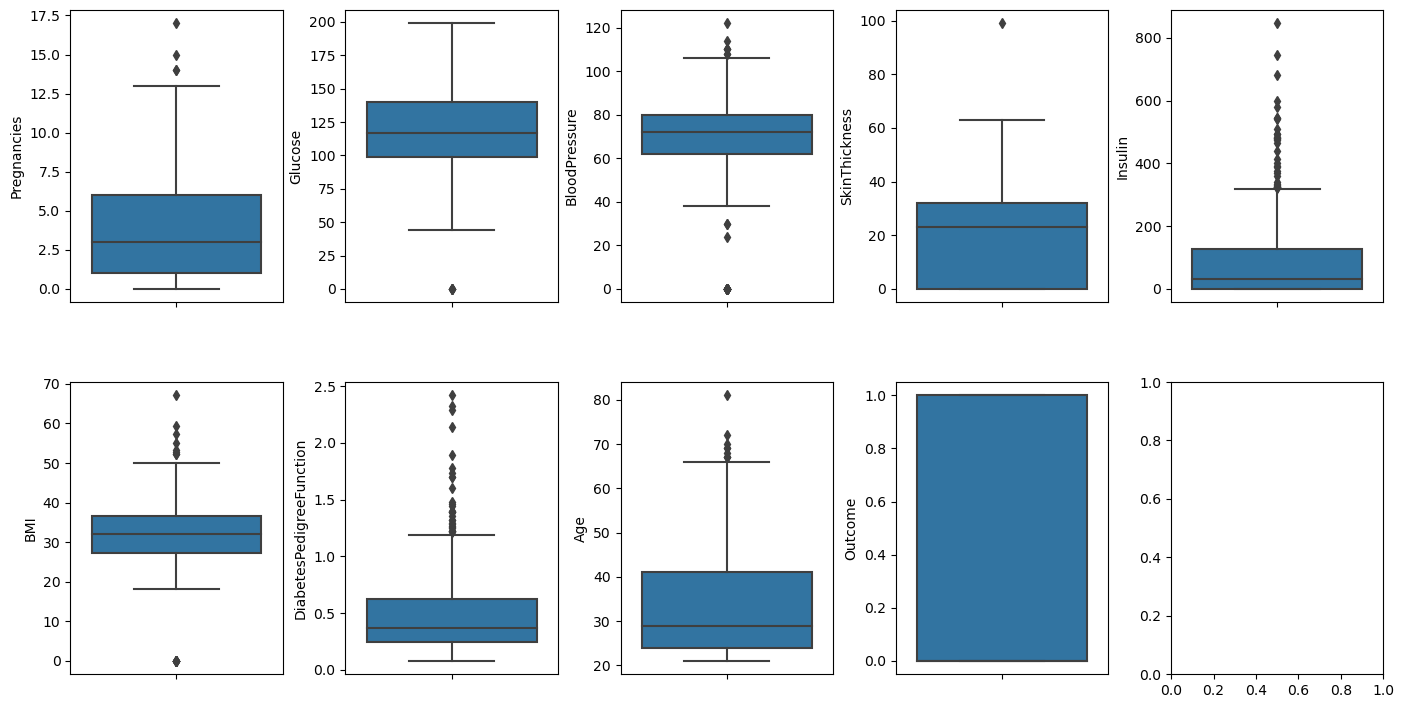

In [14]:
#Let's visualize the data for inspection of distribution and outliers
from scipy import stats

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(14, 7))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

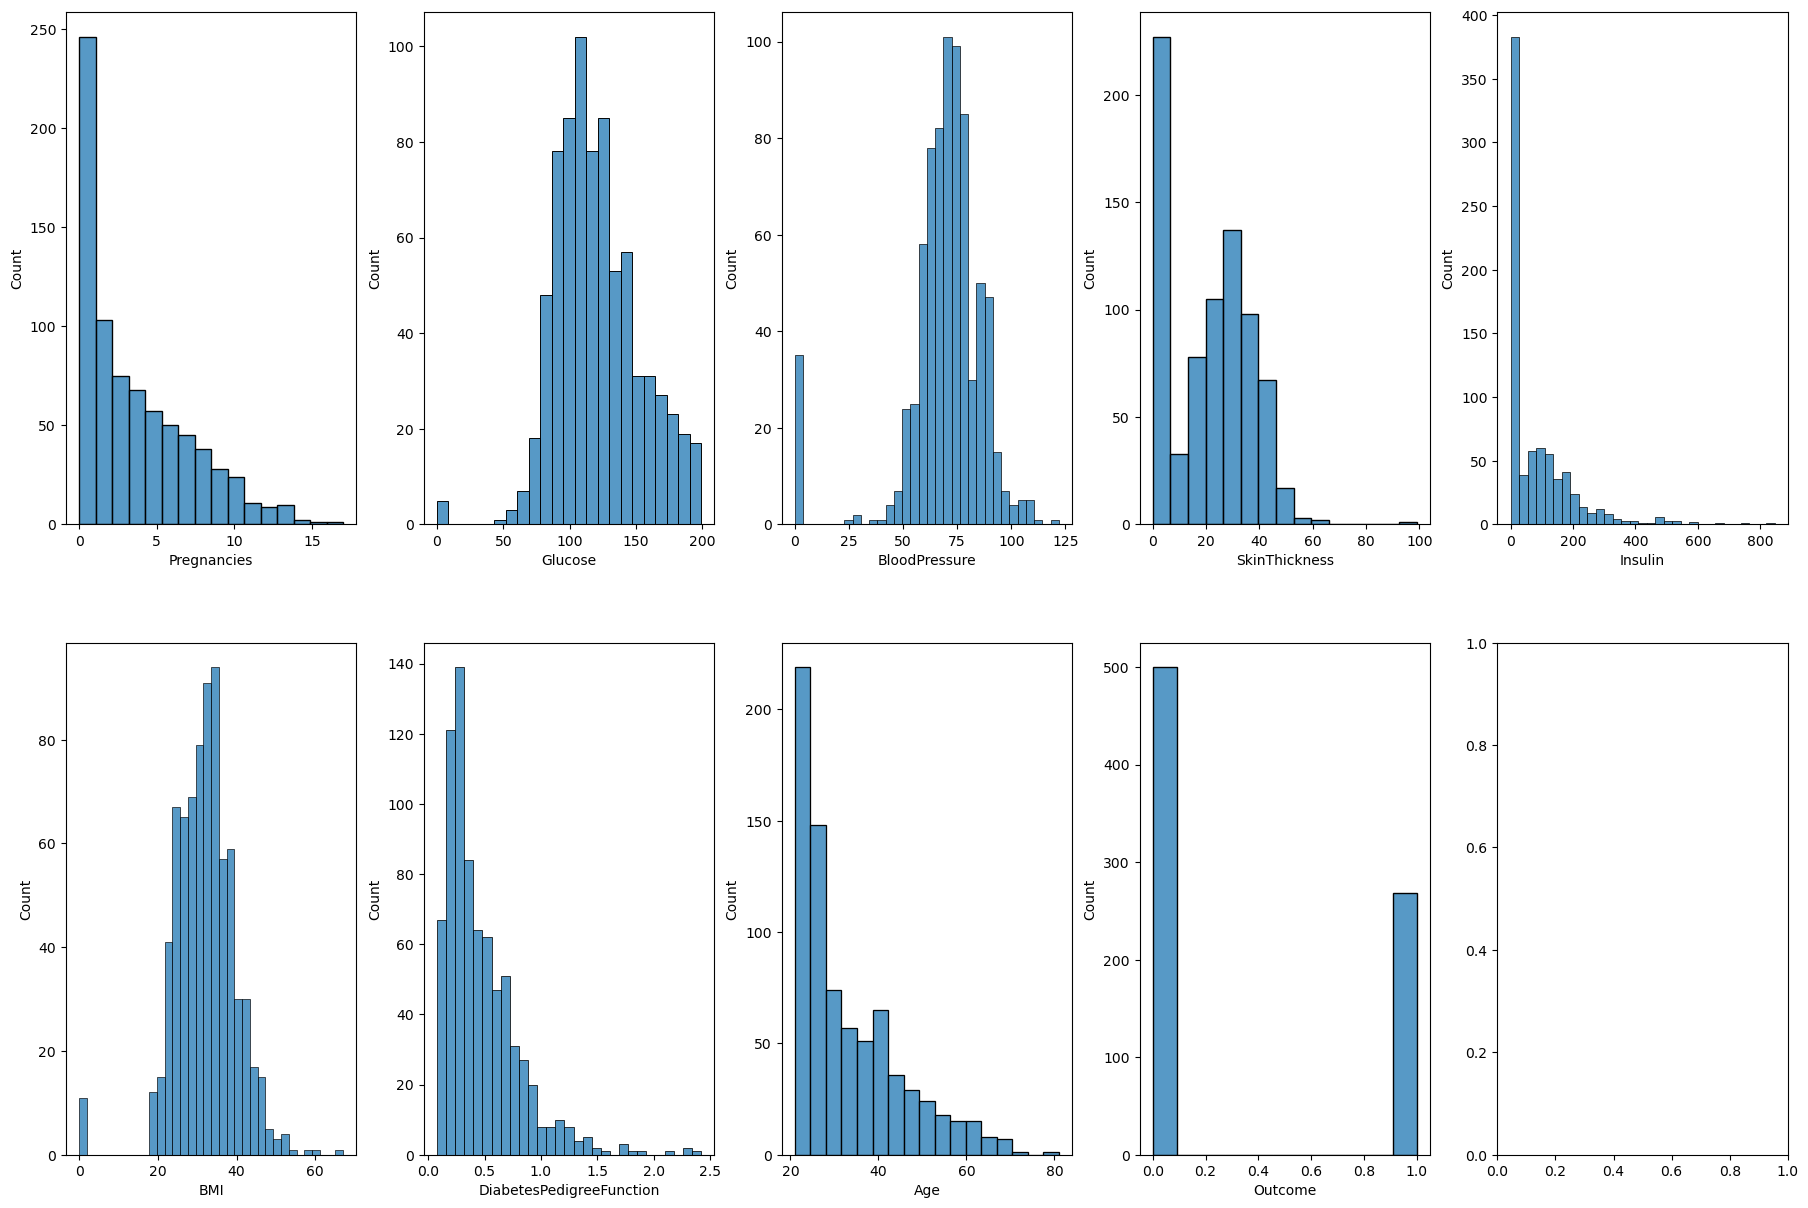

In [15]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(18, 12))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.histplot(x=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [16]:
#as per .info() there is no missing value in the data
#but there are a lot of 0 values in columns where it is not sensible to have it as 0 value in columns like 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'Age'

In [17]:
#Lets take a look at zero values in the data
zero_count_dict = {}
for col in df.columns:
    zero_count_dict[col] = df[col].value_counts().sort_index().iloc[0]
display('zerocounts: ', zero_count_dict)

'zerocounts: '

{'Pregnancies': 111,
 'Glucose': 5,
 'BloodPressure': 35,
 'SkinThickness': 227,
 'Insulin': 374,
 'BMI': 11,
 'DiabetesPedigreeFunction': 1,
 'Age': 63,
 'Outcome': 500}

In [18]:
#From above boxplot and histogram we can see that there are definetely outliers in the data, lets treat them first

In [19]:
#Applying IQR method for 'Pregnancies' variable
Q1=df['Pregnancies'].quantile(0.25)      
Q3=df['Pregnancies'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
LR = Q1-(1.5*IQR)
UR = Q3+(1.5*IQR)
print(LR, UR)

1.0
6.0
5.0
-6.5 13.5


In [20]:
#Replace the outliers with median values
median1 = df.loc[df['Pregnancies'] > 13.5, 'Pregnancies'].median()
df['Pregnancies'] = np.where(df['Pregnancies'] > 13.5, median1,df['Pregnancies'])
median2 = df.loc[df['Pregnancies'] < -6.5, 'Pregnancies'].median()
df['Pregnancies'] = np.where(df['Pregnancies'] < -6.5, median2, df['Pregnancies'])

In [21]:
#  Applying IQR method for 'Blood Pressure' variable
Q1=df['BloodPressure'].quantile(0.25)                     
Q3=df['BloodPressure'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
LR = Q1-(1.5*IQR)
LR = Q3+(1.5*IQR)
print(LR, LR)

62.0
80.0
18.0
107.0 107.0


In [22]:
# Replace the outliers values with median of dataset
median = df.loc[df['BloodPressure'] > 107, 'BloodPressure'].median()
df["BloodPressure"] = np.where(df["BloodPressure"] > 107 , median ,df['BloodPressure'])
median = df.loc[df['BloodPressure'] < 35, 'BloodPressure'].median()
df["BloodPressure"] = np.where(df["BloodPressure"] < 35, median ,df['BloodPressure'])

In [23]:
#  Applying IQR method for attribute'Insulin'
Q1=df['Insulin'].quantile(0.25)                         #using IQR method
Q3=df['Insulin'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lr = Q1-(1.5*IQR)
Ur = Q3+(1.5*IQR)
print(Lr, Ur)

0.0
127.25
127.25
-190.875 318.125


In [24]:
# Replace the outliers values with median of dataset
median = df.loc[df['Insulin'] > 318.125, 'Insulin'].median()
df["Insulin"] = np.where(df["Insulin"] > 318.125 , median ,df['Insulin'])

In [25]:
#  Applying IQR method for attribute'BMI'
Q1=df['BMI'].quantile(0.25)   
Q3=df['BMI'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lr = Q1-(1.5*IQR)
Ur = Q3+(1.5*IQR)
print(Lr, Ur)

27.3
36.6
9.3
13.35 50.550000000000004


In [26]:
# Replace the outliers values with median of dataset
median = df.loc[df['BMI'] > 50.55, 'BMI'].median()
df["BMI"] = np.where(df["BMI"] > 50.55 , median ,df['BMI'])
median = df.loc[df['BMI'] < 13.35, 'BMI'].median()
df["BMI"] = np.where(df["BMI"] < 13.35, median ,df['BMI'])

In [27]:
#  Applying IQR method for attribute'DiabetesPedigreefunction'
Q1=df['DiabetesPedigreeFunction'].quantile(0.25)       
Q3=df['DiabetesPedigreeFunction'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lr = Q1-(1.5*IQR)
Ur = Q3+(1.5*IQR)
print(Lr, Ur)

0.24375
0.62625
0.38249999999999995
-0.32999999999999996 1.2


In [28]:
# Replace the outliers values with median of dataset
median =df.loc[df['DiabetesPedigreeFunction'] > 1.2, 'DiabetesPedigreeFunction'].median()
df["DiabetesPedigreeFunction"] = np.where(df["DiabetesPedigreeFunction"] > 1.2 , median ,df['DiabetesPedigreeFunction'])

median = df.loc[df['DiabetesPedigreeFunction'] < -0.32999999999999996, 'DiabetesPedigreeFunction'].median()
df["DiabetesPedigreeFunction"] = np.where(df["DiabetesPedigreeFunction"] < -0.32999999999999996 , median ,df['DiabetesPedigreeFunction'])

In [29]:
#Replacing the 0 values as null values, so we can treat them

In [30]:
df[["Glucose", "SkinThickness","Insulin",
    "BloodPressure","BMI"]] =  df[["Glucose","SkinThickness", "Insulin","BloodPressure","BMI"]].replace(0, np.NaN)

In [31]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                38
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [32]:
# fill missing values with mean values
df.fillna(df.mean(),inplace=True)

In [33]:
#Sanity check
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [34]:
#Seperating the data into Target and predictors
Target = df['Outcome']
Predictor = df.drop(['Outcome'], axis = 1)

In [35]:
#Splitting the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Predictor, Target, test_size = 0.20, random_state = 0)

In [36]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [37]:
from sklearn.svm import SVC

In [38]:
svc_s_model = SVC(kernel='poly',gamma=8)

In [39]:
svc_s_model.fit(X_train, y_train)

SVC(gamma=8, kernel='poly')

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
predictions= svc_s_model.predict(X_train)
percentage=svc_s_model.score(X_train,y_train)
res=confusion_matrix(y_train,predictions)
print("Training confusion matrix")
print(res)
predictions= svc_s_model.predict(X_test)
percentage=svc_s_model.score(X_test,y_test)
res=confusion_matrix(y_test,predictions)
print("validation confusion matrix")
print(res)
print(classification_report(y_test, predictions))
# check the accuracy on the training set
print('training accuracy = '+str(svc_s_model.score(X_train, y_train)*100))
print('testing accuracy = '+str(svc_s_model.score(X_test, y_test)*100))

Training confusion matrix
[[363  30]
 [ 70 151]]
validation confusion matrix
[[93 14]
 [19 28]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       107
           1       0.67      0.60      0.63        47

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154

training accuracy = 83.71335504885994
testing accuracy = 78.57142857142857


In [41]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.162437,33.6,0.627,50,1
1,1.0,85.0,66.0,29.00000,155.162437,26.6,0.351,31,0
2,8.0,183.0,64.0,29.15342,155.162437,23.3,0.672,32,1
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,1.394,33,1


In [42]:
arr_n = ms.fit_transform(df.iloc[: , :8])

In [43]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [44]:
df_n = pd.DataFrame(arr_n, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

In [45]:
df_n['Outcome'] = df.Outcome

In [46]:
df_n.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.413793,0.670968,0.472222,0.304348,0.321921,0.428969,0.417173,0.483333,1
1,0.068966,0.264516,0.388889,0.239130,0.321921,0.233983,0.207447,0.166667,0
2,0.551724,0.896774,0.361111,0.240798,0.321921,0.142061,0.451368,0.183333,1
3,0.068966,0.290323,0.388889,0.173913,0.182440,0.275766,0.067629,0.000000,0
4,0.000000,0.600000,0.027778,0.304348,0.351197,0.693593,1.000000,0.200000,1


In [47]:
print(df['Outcome'].value_counts())
df_class_0 = df[df['Outcome'] == 0]
df_class_1 = df[df['Outcome'] == 1]

0    500
1    268
Name: Outcome, dtype: int64


In [48]:
print(df_n.iloc[: , 8].value_counts())
df_n_class_0 = df_n[df_n.iloc[: , 8] == 0]
df_n_class_1 = df_n[df_n.iloc[: , 8] == 1]

0    500
1    268
Name: Outcome, dtype: int64


In [49]:
df_class_1_over = df_class_1.sample(500, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_over.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 614
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   float64
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   int64  
 8   Outcome                   1000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 78.1 KB


In [50]:
df_n_class_1_over = df_n_class_1.sample(500, replace=True)
df_test_n_over = pd.concat([df_n_class_0, df_n_class_1_over], axis=0)
df_test_n_over.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 712
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   float64
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Outcome                   1000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 78.1 KB


In [51]:
y1=df_test_over['Outcome']
df_test_over=df_test_over.drop(['Outcome'],axis=1)
X1=df_test_over

In [52]:
y1n=df_test_n_over.iloc[:, 8]
df_test_n_over=df_test_n_over.iloc[:, :8]
X1n=df_test_n_over

In [53]:
X1n

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,0.068966,0.264516,0.388889,0.239130,0.321921,0.233983,0.207447,0.166667
3,0.068966,0.290323,0.388889,0.173913,0.182440,0.275766,0.067629,0.000000
5,0.344828,0.464516,0.500000,0.240798,0.321921,0.206128,0.093465,0.150000
7,0.689655,0.458065,0.480156,0.240798,0.321921,0.476323,0.042553,0.133333
10,0.275862,0.425806,0.750000,0.240798,0.321921,0.540390,0.085866,0.150000
...,...,...,...,...,...,...,...,...
317,0.206897,0.890323,0.500000,0.240798,0.321921,0.342618,0.202888,0.133333
370,0.206897,0.832258,0.611111,0.445652,1.000000,0.562674,1.000000,0.066667
695,0.482759,0.632258,0.722222,0.184783,1.000000,0.339833,0.037994,0.366667
321,0.206897,0.438710,0.500000,0.250000,0.321921,0.373259,0.090426,0.066667


In [54]:
from sklearn.model_selection import train_test_split

X1_s_train,X1_s_test ,y1_s_train, y1_s_test = train_test_split(X1,y1,
                                                   test_size=0.25,
                                                   random_state=0,
                                                  shuffle = True,
                                                  stratify = y1)

print('training data shape is :{}.'.format(X1_s_train.shape))
print('training label shape is :{}.'.format(y1_s_train.shape))
print('testing data shape is :{}.'.format(X1_s_test.shape))
print('testing label shape is :{}.'.format(y1_s_test.shape))

training data shape is :(750, 8).
training label shape is :(750,).
testing data shape is :(250, 8).
testing label shape is :(250,).


In [55]:
from sklearn.model_selection import train_test_split

X1_s_n_train,X1_s_n_test ,y1_s_n_train, y1_s_n_test = train_test_split(X1n,y1n,
                                                   test_size=0.2,
                                                   random_state=0,
                                                  shuffle = True,
                                                  stratify = y1n)

print('training data shape is :{}.'.format(X1_s_n_train.shape))
print('training label shape is :{}.'.format(y1_s_n_train.shape))
print('testing data shape is :{}.'.format(X1_s_n_test.shape))
print('testing label shape is :{}.'.format(y1_s_n_test.shape))

training data shape is :(800, 8).
training label shape is :(800,).
testing data shape is :(200, 8).
testing label shape is :(200,).


In [65]:
from sklearn.svm import SVC
svc_s_model = SVC(kernel='rbf',gamma=8)
svc_s_model.fit(X1_s_n_train, y1_s_n_train)

SVC(gamma=8)

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
predictions= svc_s_model.predict(X1_s_n_train)
percentage=svc_s_model.score(X1_s_n_train,y1_s_n_train)
res=confusion_matrix(y1_s_n_train,predictions)
print("Training confusion matrix")
print(res)
predictions= svc_s_model.predict(X1_s_n_test)
percentage=svc_s_model.score(X1_s_n_test,y1_s_n_test)
res=confusion_matrix(y1_s_n_test,predictions)
print("validation confusion matrix")
print(res)
print(classification_report(y1_s_n_test, predictions))
# check the accuracy on the training set
print('training accuracy = '+str(svc_s_model.score(X1_s_n_train, y1_s_n_train)*100))
print('testing accuracy = '+str(svc_s_model.score(X1_s_n_test, y1_s_n_test)*100))

Training confusion matrix
[[343  57]
 [ 40 360]]
validation confusion matrix
[[78 22]
 [15 85]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       100
           1       0.79      0.85      0.82       100

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200

training accuracy = 87.875
testing accuracy = 81.5


In [69]:
#Prediction system
input_data = (4,110,92,0,0,37.6,0.191,30)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = svc_s_model.predict(norm_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


C:\Users\Tejas Ligade\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [70]:
#Saving the trained model
import pickle

In [71]:
filename = 'trained_mod1.sav'
pickle.dump(svc_s_model, open(filename, 'wb')) #wb = writing binary

In [73]:
#Loading the saved model 
loaded_mod = pickle.load(open('trained_mod1.sav', 'rb')) #rb = reading binary

In [74]:
input_data = (4,110,92,0,0,37.6,0.191,30)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_mod.predict(norm_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


C:\Users\Tejas Ligade\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
